In [1]:
import os
import numpy as np
import pandas as pd
import timeit
import matplotlib.pyplot as plt

In [ ]:
defdir="D:/Bitirme projeleri/datasets/Düzenlenmiş olanlar/esc50/audio/audio"
os.chdir(defdir)
esc50=pd.read_csv("esc50.csv")

In [9]:
def plot_acc_loss(accuracy, loss, val_accuracy, val_loss, epochs):   
  plt.figure()
  plt.plot(epochs, accuracy, 'r--', label='Training accuracy')
  plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.grid()
  plt.axis([0, len(epochs), np.min(accuracy), np.max(val_accuracy)])
  plt.title("Accuracy for Sound Classification")
  plt.legend()
  plt.show()

  plt.figure()
  plt.plot(epochs, loss, 'r--', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.grid()
  plt.axis([0, len(epochs), np.min(loss), np.max(val_loss)])
  plt.title("Accuracy for Sound Classification")
  plt.legend()
  plt.show()

In [ ]:
def audio_augmentation(panda_frame,current_audio_path,target_path,amount,new_csv_name):
    import librosa
    import os
    number_file=len(panda_frame.iloc[:,0])
    i1=0
    while i1<number_file:        
        os.chdir(str(current_audio_path))
        audio_data, sr = librosa.load(panda_frame.iloc[i1,0])
        os.chdir(str(target_path))
        file_name=str(panda_frame.iloc[i1,0])   
        i=0
        b=np.split(audio_data,amount)
        while i<amount:            
            new_Audio=np.hstack((b[i%amount], b[(i+1)%amount],b[(i+2)%amount],b[(i+3)%amount],b[(i+4)%amount]))
            x = file_name.split(".")
            file_name1=x[0]+"_"+str(i)+".wav"
            new_row=[[file_name1,panda_frame.iloc[i1,1]]]
            new_row_df=pd.DataFrame(new_row,columns={panda_frame.columns[0],panda_frame.columns[1]})
            panda_frame=panda_frame.append(new_row_df)
            librosa.output.write_wav(file_name1, new_Audio, sr, norm=False)
            i=i+1
        print(i1,".yazdirildi")
            
        panda_frame = panda_frame.drop([i1], axis=0)    
        i1=i1+1
    panda_frame.reset_index(inplace=True)
    new_csv_name1=new_csv_name.split(". ")
    new_csv_name=new_csv_name1[0]+".csv"
    panda_frame.to_csv(new_csv_name, index = None, header=True) #Don't forget to add '.csv' at the end of the path

In [2]:
defdir="D:\esc50_newaudio"
os.chdir(defdir)
esc50=pd.read_csv("new_esc50.csv")

In [3]:
 esc501 = esc50.drop((esc50.index[0:2000]), axis=0)

In [4]:
esc501.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 2000 to 11999
Data columns (total 3 columns):
index       10000 non-null int64
filename    10000 non-null object
category    10000 non-null object
dtypes: int64(1), object(2)
memory usage: 312.5+ KB


In [18]:
y=esc501.loc[:,"category"]
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

y1 = enc.fit_transform(y)
esc501["label_number"]=y1
i=1
k=0
lll=esc501[esc501['label_number']==0]
train=lll.iloc[0:150,:]
valudation=lll.iloc[150:175,:]
test=lll.iloc[175:200,:]
while k<49:    
    lll= esc501[esc501['label_number']==i]
    c=pd.DataFrame(lll.iloc[0:150,:])
    d=pd.DataFrame(lll.iloc[150:175,:])
    e=pd.DataFrame(lll.iloc[175:200,:])
    train=train.append(c)
    valudation=valudation.append(d)
    test=test.append(e)
    k=k+1
    i=i+1
#train.drop(['fold', 'target','category','esc10','src_file','take'], axis=1,inplace=True)
#test.drop(['fold', 'target','category','esc10','src_file','take'], axis=1,inplace=True)
#valudation.drop(['fold', 'target','category','esc10','src_file','take'], axis=1,inplace=True)
train.reset_index(level=None, drop=True, inplace=True, col_level=0, col_fill='')
test.reset_index(level=None, drop=True, inplace=True, col_level=0, col_fill='')
valudation.reset_index(level=None, drop=True, inplace=True, col_level=0, col_fill='')

In [16]:
esc50["label_number"]

0       0
1       0
2       0
3       0
4       0
       ..
1995    4
1996    4
1997    4
1998    4
1999    4
Name: label_number, Length: 2000, dtype: int64

In [43]:

from librosa.feature import mfcc
from sklearn.preprocessing import scale
from glob import glob
import numpy as np
import scipy
	
import os
defdir=os.getcwd()

try:
  os.mkdir('{0}/audio/audio/'.format(defdir))
except:print("")
  
os.chdir('{0}/audio/audio/'.format(defdir))

FileNotFoundError: [WinError 3] Sistem belirtilen yolu bulamıyor: 'D:\\esc50_newaudio/audio/audio/'

In [52]:
import librosa
import matplotlib.pyplot as plt
import cv2
import os
from scipy import signal
from scipy.io import wavfile







sr,audio_data = wavfile.read(train.filename[0])
train_k = librosa.feature.melspectrogram(y=audio_data, sr=sr )
train_k= librosa.power_to_db(train_k**2, ref=np.max)
train_k=cv2.resize(train_k, dsize=(180, 180), interpolation=cv2.INTER_CUBIC)
train_k1=train_k.reshape(180,180,1)

    

i=1
while i<7500:  
    sr,audio_data = wavfile.read(train.filename[i])
    train_k = librosa.feature.melspectrogram(y=audio_data, sr=sr )
    train_k= librosa.power_to_db(train_k**2, ref=np.max)
    train_k=cv2.resize(train_k, dsize=(180, 180), interpolation=cv2.INTER_CUBIC)
    train_k=train_k.reshape(180,180,1)
    train_k1=np.append(train_k1,train_k,2)
    i=i+1
    print(i,"/7500")
  
sr,audio_data = wavfile.read(test.filename[0])
test_k = librosa.feature.melspectrogram(y=audio_data, sr=sr )
test_k= librosa.power_to_db(test_k**2, ref=np.max)
test_k=cv2.resize(test_k, dsize=(180, 180), interpolation=cv2.INTER_CUBIC)
test_k1=test_k.reshape(180,180,1)

    

i=1
while i<1250:  
    sr,audio_data = wavfile.read(test.filename[i])
    test_k = librosa.feature.melspectrogram(y=audio_data, sr=sr )
    test_k= librosa.power_to_db(test_k**2, ref=np.max)
    test_k=cv2.resize(test_k, dsize=(180, 180), interpolation=cv2.INTER_CUBIC)
    test_k=test_k.reshape(180,180,1)
    test_k1=np.append(test_k1,test_k,2)
    i=i+1
    print(i,"/1250")

sr,audio_data = wavfile.read(valudation.filename[0])
valudation_k = librosa.feature.melspectrogram(y=audio_data, sr=sr )
valudation_k= librosa.power_to_db(valudation_k**2, ref=np.max)
valudation_k=cv2.resize(valudation_k, dsize=(180, 180), interpolation=cv2.INTER_CUBIC)
valudation_k1=valudation_k.reshape(180,180,1)

    

i=1
while i<1250:  
    sr,audio_data = wavfile.read(valudation.filename[i])
    valudation_k = librosa.feature.melspectrogram(y=audio_data, sr=sr )
    valudation_k= librosa.power_to_db(valudation_k**2, ref=np.max)
    valudation_k=cv2.resize(valudation_k, dsize=(180, 180), interpolation=cv2.INTER_CUBIC)
    valudation_k=valudation_k.reshape(180,180,1)
    valudation_k1=np.append(valudation_k1,valudation_k,2)
    i=i+1
    print(i,"/1250")
    


2 /7500
3 /7500
4 /7500
5 /7500
6 /7500
7 /7500
8 /7500
9 /7500
10 /7500
11 /7500
12 /7500
13 /7500
14 /7500
15 /7500
16 /7500
17 /7500
18 /7500
19 /7500
20 /7500
21 /7500
22 /7500
23 /7500
24 /7500
25 /7500
26 /7500
27 /7500
28 /7500
29 /7500
30 /7500
31 /7500
32 /7500
33 /7500
34 /7500
35 /7500
36 /7500
37 /7500
38 /7500
39 /7500
40 /7500
41 /7500
42 /7500
43 /7500
44 /7500
45 /7500
46 /7500
47 /7500
48 /7500
49 /7500
50 /7500
51 /7500
52 /7500
53 /7500
54 /7500
55 /7500
56 /7500
57 /7500
58 /7500
59 /7500
60 /7500
61 /7500
62 /7500
63 /7500
64 /7500
65 /7500
66 /7500
67 /7500
68 /7500
69 /7500
70 /7500
71 /7500
72 /7500
73 /7500
74 /7500
75 /7500
76 /7500
77 /7500
78 /7500
79 /7500
80 /7500
81 /7500
82 /7500
83 /7500
84 /7500
85 /7500
86 /7500
87 /7500
88 /7500
89 /7500
90 /7500
91 /7500
92 /7500
93 /7500
94 /7500
95 /7500
96 /7500
97 /7500
98 /7500
99 /7500
100 /7500
101 /7500
102 /7500
103 /7500
104 /7500
105 /7500
106 /7500
107 /7500
108 /7500
109 /7500
110 /7500
111 /7500
112 /7

In [30]:
import numpy as np
import scipy.io

# Some test data


# Specify the filename of the .mat file
matfile1 = 'train_mat.mat'
scipy.io.savemat(matfile1, mdict={'out': train_k1}, oned_as='row')
matfile2 = 'test_mat.mat'
scipy.io.savemat(matfile2, mdict={'out': test_k1}, oned_as='row')
matfile3 = 'valudation_mat.mat'
scipy.io.savemat(matfile3, mdict={'out': valudation_k1}, oned_as='row')

# Write the array to the mat file. For this to work, the array must be the value
# corresponding to a key name of your choice in a dictionary


# For the above line, I specified the kwarg oned_as since python (2.7 with 
# numpy 1.6.1) throws a FutureWarning.  Here, this isn't really necessary 
# since oned_as is a kwarg for dealing with 1-D arrays.

# Now load in the data from the .mat that was just saved


In [11]:
import scipy.io
matfile1 = 'train_mat.mat'
matfile = 'X.mat'
matfile2 = 'test_mat.mat'

matfile3 = 'valudation_mat.mat'


matdata1 = scipy.io.loadmat(matfile1)
#assert np.all(train_k1 == matdata1['out'])
matdata2 = scipy.io.loadmat(matfile2)
#assert np.all(test_k1 == matdata2['out'])
matdata3 = scipy.io.loadmat(matfile3)
#assert np.all(valudation_k1 == matdata3['out'])

In [12]:
import scipy.io
matfile1 = 'train_mat.mat'

matfile2 = 'test_mat.mat'

matfile3 = 'valudation_mat.mat'

train_k1=matdata1['out']
test_k1=matdata2['out']
valudation_k1=matdata3['out']

In [13]:
train_k1=train_k1[:,:,0:10000]
train_k1.shape

(180, 180, 10000)

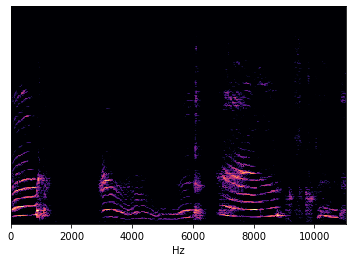

In [15]:
import librosa
import matplotlib.pyplot as plt
import cv2
import os
defdir="D:/Bitirme projeleri/datasets/Düzenlenmiş olanlar/esc50/audio/audio"
os.chdir(defdir)
from librosa import display
audio_data, sr = librosa.load("4-185575-B-20.wav")
train_k = np.abs(librosa.stft(audio_data,n_fft=1024))
DB = librosa.amplitude_to_db(train_k**2, ref=np.max)
ps_db= librosa.power_to_db(train_k**2., ref=np.max)
librosa.display.specshow(DB, sr=sr,    x_axis='linear');
#train_k=cv2.resize(train_k, dsize=(180, 180), interpolation=cv2.INTER_CUBIC)
#defdir="D:/Bitirme projeleri/datasets/Düzenlenmiş olanlar/esc50/audio/audio/44100"
#os.chdir(defdir)




#DB = librosa.amplitude_to_db(train_k, ref=np.max)
#librosa.display.specshow(DB, sr=sr,    x_axis='linear');

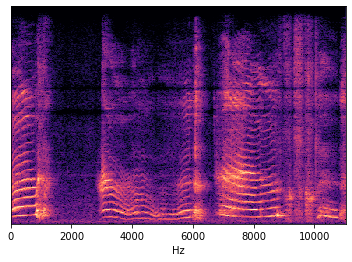

In [12]:
DB = librosa.amplitude_to_db(train_k, ref=np.max)
librosa.display.specshow(DB, sr=sr,    x_axis='linear');

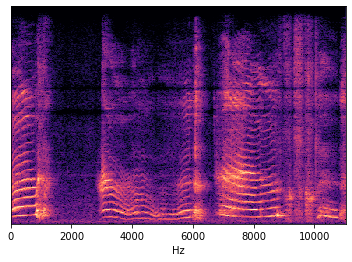

In [10]:
librosa.display.specshow(ps_db, sr=sr,    x_axis='linear');

In [23]:
pip install -U numpy

Requirement already up-to-date: numpy in c:\users\burak\anaconda3\envs\tf_gpu\lib\site-packages (1.17.4)
Note: you may need to restart the kernel to use updated packages.


In [19]:
import numpy as np
from numpy import core

y_train=np.array(train["label_number"])
y_test=np.array(test["label_number"])
y_valudation=np.array(valudation["label_number"])
y_train=np.append(y_train,y_valudation,0)
y_train=np.append(y_train,y_test,0)



In [22]:
Y=y_train.reshape(-1, 1)

In [23]:
from keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(Y)

y2_train=enc.transform(y_train.reshape(-1, 1))
y_test=enc.transform(y_test.reshape(-1, 1))
y_valid=enc.transform(y_valudation.reshape(-1, 1))
y2_train=y2_train.toarray()
y_test=y_test.toarray()
y_valid=y_valid.toarray()

In [24]:
from keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(Y.reshape(-1, 1))
Y1=enc.transform(Y.reshape(-1, 1))

In [25]:
train_k1.shape

(180, 180, 10000)

In [26]:
train_k1=train_k1.reshape(10000,180,180)


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_k1,Y1,test_size=0.125,random_state=4, shuffle=True)
X2_train, X_valid, y2_train,y_valid = train_test_split(X_train,y_train,test_size=0.142857,random_state=4, shuffle=True)

In [28]:

import keras

from keras.models import Sequential,load_model
from keras.layers import Dense, Flatten, Dropout, Conv2D, BatchNormalization,MaxPooling2D
from keras import backend as K
from keras.layers import Conv2D
from keras.regularizers import l2

import matplotlib.pyplot  as plt


# Keras modelimizi olusturalim

def get_model(no_inputs, no_outputs):
    model = Sequential()
    model.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=(180, 180,1),data_format='channels_last',kernel_regularizer=l2(0.0001), bias_regularizer=l2(0.0001)))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))    
    model.add(Dense(50, activation='softmax'))
  #  model.compile(optimizer="RMSprop", loss="categorical_crossentropy", metrics=["accuracy"])
    
    
    return model

In [34]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Dropout, BatchNormalization, MaxPooling2D
def get_model(no_inputs, no_outputs):
    m = Sequential()
    m.add(Conv2D(32,kernel_size=(5,5),strides=(1,1),activation='relu',input_shape=no_inputs))
    m.add(BatchNormalization())
    m.add(MaxPooling2D())
    m.add(Conv2D(32,kernel_size=(5,5),strides=(1,1),activation='relu'))
    m.add(BatchNormalization())
    m.add(MaxPooling2D())
    m.add(Conv2D(64,kernel_size=(5,5),strides=(1,1),activation='relu'))
    m.add(BatchNormalization())
    m.add(Conv2D(128,kernel_size=(5,5),strides=(1,1),activation='relu'))
    m.add(BatchNormalization())
    m.add(Conv2D(64,kernel_size=(5,5),strides=(1,1),activation='relu'))
    m.add(BatchNormalization())
    m.add(Conv2D(32,kernel_size=(5,5),strides=(1,1),activation='relu'))
    m.add(BatchNormalization())
    m.add(Flatten())
    m.add(Dense(256,activation='relu'))
    m.add(Dropout(0.5))
    m.add(Dense(no_outputs, activation="softmax"))
    return model


In [37]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Dropout, BatchNormalization, MaxPooling2D,Activation
def get_model(no_inputs, no_outputs):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding='same',input_shape=no_inputs))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(128, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(50, activation='sigmoid', name='output'))
    return model

In [35]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.layers import Dense, Dropout, Reshape, Permute
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.layers.recurrent import GRU
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
import matplotlib.pyplot as plt
#from keras.utils.visualize_util import plot

def get_model(no_inputs, no_outputs):
    x = Convolution2D(30, 3, 3, border_mode='valid', activation='relu', name='conv1')(no_inputs)
    x = BatchNormalization(axis=1, mode=0)(x)
    x = MaxPooling2D(pool_size=(3, 2), strides=(3, 2), name='pool1')(x)
    x = Dropout(0.1, name='dropout1')(x)

    x = Convolution2D(60, 3, 3, border_mode='valid', activation='relu', name='conv2')(x)
    x = BatchNormalization(axis=1, mode=0)(x)
    x = MaxPooling2D(pool_size=(3, 2), strides=(3, 2), name='pool2')(x)
    x = Dropout(0.1, name='dropout2')(x)

    x = Convolution2D(60, 3, 3, border_mode='valid', activation='relu', name='conv3')(x)
    x = BatchNormalization(axis=1, mode=0)(x)
    x = MaxPooling2D(pool_size=(4, 2), strides=(4, 2), name='pool3')(x)
    x = Dropout(0.1, name='dropout3')(x)

    x = Convolution2D(60, 3, 3, border_mode='valid', activation='relu', name='conv4')(x)
    x = BatchNormalization(axis=1, mode=0)(x)
    x = MaxPooling2D(pool_size=(4, 2), strides=(4, 2), name='pool4')(x)
    x = Dropout(0.1, name='dropout4')(x)


    x = Permute((3, 1, 2))(x)
    x = Reshape((14, 60))(x)

    x = GRU(30, return_sequences=True, name='gru1')(x)
    x = GRU(30, return_sequences=False, name='gru2')(x)
    x = Dropout(0.3, name='dropout5')(x)

    output = Dense(no_outputs, activation='sigmoid', name='output')(x)

    model = Model(no_inputs, output)

    model.compile(loss='categorical_crossentropy',
                  optimizer=SGD(lr=0.01, decay=1e-8, momentum=0.9, nesterov=True), 
                  metrics=['accuracy'])
    return model

In [29]:
y_test=y_test.reshape(1250,50)
y2_train=y2_train.reshape(7500,50)
y_valid=y_valid.reshape(1250,50)

X2_train=X2_train.reshape(7500,180,180,1)
X_valid=X_valid.reshape(1250,180,180,1)
X_test=X_test.reshape(1250,180,180,1)


In [32]:
m=get_model(1,1)
m.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 178, 178, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 87, 87, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 43, 43, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 43, 43, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 118336)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

In [18]:
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
train_datagen = ImageDataGenerator( width_shift_range=0.75, height_shift_range=0.1,   vertical_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator( width_shift_range=0.75, height_shift_range=0.1,  vertical_flip=True, fill_mode='nearest')
m = get_model((180, 180,1),50)
m.compile(optimizer="RMSprop", loss="categorical_crossentropy", metrics=["categorical_accuracy"])

train_generator = train_datagen.flow(X2_train, y2_train,batch_size=30)
val_generator = val_datagen.flow(X_valid, y_valid, batch_size=30)
history = m.fit_generator(train_generator, 
                              steps_per_epoch=125, epochs=200,validation_data=val_generator,validation_steps=50,verbose=1)
m.save('model.h5')

TypeError: sparse matrix length is ambiguous; use getnnz() or shape[0]

In [ ]:

m = get_model((180, 180,1),50)
m.compile(optimizer="RMSprop", loss="categorical_crossentropy", metrics=["accuracy"])
m.fit(X2_train, y2_train, batch_size=100, epochs=100, validation_data=(X_valid, y_valid))
m.save('model.h5')


Train on 7500 samples, validate on 1250 samples
Epoch 1/100
7500/7500 [==============================] - 118s 16ms/step - loss: 17.2677 - accuracy: 0.0367 - val_loss: 3.7119 - val_accuracy: 0.0448
Epoch 2/100
7500/7500 [==============================] - 117s 16ms/step - loss: 4.6604 - accuracy: 0.0713 - val_loss: 3.7150 - val_accuracy: 0.0952
Epoch 3/100
7500/7500 [==============================] - 125s 17ms/step - loss: 5.3575 - accuracy: 0.1408 - val_loss: 3.3092 - val_accuracy: 0.1200
Epoch 4/100
7500/7500 [==============================] - 124s 17ms/step - loss: 4.0141 - accuracy: 0.2609 - val_loss: 2.9429 - val_accuracy: 0.2384
Epoch 5/100
7500/7500 [==============================] - 127s 17ms/step - loss: 7.9689 - accuracy: 0.3343 - val_loss: 3.2957 - val_accuracy: 0.2096
Epoch 6/100
7500/7500 [==============================] - 125s 17ms/step - loss: 2.4241 - accuracy: 0.4875 - val_loss: 2.7486 - val_accuracy: 0.3016
Epoch 7/100
7500/7500 [==============================] - 128s 1

In [23]:
ynew = m.predict_classes(X_test)

In [50]:
y_pred = to_categorical(ynew)
type(y_test.toarray())

numpy.ndarray

In [58]:

type(l[1,1])

numpy.float32

In [56]:
import numpy as np
from scipy.sparse import csr_matrix
l=csr_matrix(y_test, dtype=np.float32).toarray()

In [59]:
import numpy as np
from sklearn.metrics import accuracy_score
accuracy_score(l,y_pred )

0.4392

In [60]:
print("accuracy: " + str(acc(y_test, y_pred)))

C:\Users\Burak\Anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:1: SparseEfficiencyWarning: Comparing a sparse matrix with 0 using == is inefficient, try using != instead.
  """Entry point for launching an IPython kernel.


SystemError: <built-in function isinstance> returned a result with an error set

In [0]:
test_loss, test_acc = m.evaluate(X_test, y_test)
print('Test loss', test_loss)
print('Test accuracy', test_acc)


800/800 [==============================] - 1s 2ms/step
Test loss 15.025935173034668
Test accuracy 0.0175


In [0]:
embedding_matrix = np.zeros(((220500, 100)))

In [30]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Masking, Embedding

model = Sequential()

# Embedding layer
model.add(
    Embedding(input_dim=220500,
              input_length = 50,
              output_dim=100,
              weights=[embedding_matrix],
              trainable=False,
              mask_zero=True))

# Masking layer for pre-trained embeddings
model.add(Masking(mask_value=0.0))

# Recurrent layer
model.add(LSTM(64, return_sequences=False, 
               dropout=0.1, recurrent_dropout=0.1))

# Fully connected layer
model.add(Dense(64, activation='relu'))

# Dropout for regularization
model.add(Dropout(0.5))

# Output layer
model.add(Dense(50, activation='softmax'))

# Compile the model
model.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
import numpy as np
myarray = np.asarray(list1)
y1=reshape(1,2000)


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(myarray,y1,test_size=0.4,random_state=4, shuffle=True)
X2_train, X_valid, y2_train,y_valid = train_test_split(X_train,y_train,test_size=0.1,random_state=4, shuffle=True)

In [57]:
myarray.shape

(2000, 1)

In [50]:
y_test=y_test.reshape(800,50)
y2_train=y2_train.reshape(1080,50)
y_valid=y_valid.reshape(120,50)

ValueError: ignored

In [58]:
list1

,0
0,18
1,7
2,46
3,46
4,43
...,...
1995,29
1996,46
1997,24
1998,39


In [0]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Create callbacks
callbacks = [EarlyStopping(monitor='val_loss', patience=5),
             ModelCheckpoint('../models/model.h5')]

In [56]:
history = model.fit(X_train,  y_train, 
                    batch_size=2048, epochs=150,
                    callbacks=callbacks,
                    validation_data=(X_valid, y_valid))

ValueError: ignored

In [0]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

# Normalize grades to values between 0 and 1 for more efficient computation
normalized_range = sklearn.preprocessing.MinMaxScaler(xtrain=(-1,1))

# Extract Features + Labels
labels.shape =  (100,) #scikit expects this
features = normalized_range.fit_transform(features)

# Create Test/Train
features_train,features_test,labels_train,labels_test = train_test_split(features,labels,test_size=0.4)

# Scikit Logistic Regression
scikit_log_reg = LogisticRegression()
scikit_log_reg.fit(features_train,labels_train)

#Score is Mean Accuracy
scikit_score = clf.score(features_test,labels_test)
print 'Scikit score: ', scikit_score

#Our Mean Accuracy
observations, features, labels, weights = run()
probabilities = predict(features, weights).flatten()
classifications = classifier(probabilities)
our_acc = accuracy(classifications,labels.flatten())
print 'Our score: ',our_acc

In [5]:
import librosa
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.io.wavfile as wav

list2=[]

file_list = glob("*.wav")
y, sr = librosa.load(esc50.filename[0])
#rate, aud = scipy.io.wavfile.read(filename)
D = np.abs(librosa.stft(y))
#specgram = stft.spectrogram(aud)
res = cv2.resize(D, dsize=(180, 180), interpolation=cv2.INTER_CUBIC)
k=res.reshape(180,180,1)

    

i=1
while i<2000:
    y, sr = librosa.load(esc50.filename[i])
    #rate, aud = scipy.io.wavfile.read(filename)
    D = np.abs(librosa.stft(y))
    #specgram = stft.spectrogram(aud)
    res = cv2.resize(D, dsize=(180, 180), interpolation=cv2.INTER_CUBIC)
    res=res.reshape(180,180,1)
    k=np.append(k,res,2)
    i=i+1
    print(i)
    
    


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27